In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import nibabel as nib
import imageio as io
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2

In [2]:
mri = nib.load("imagesTr/BRATS_001.nii.gz")
image = mri.get_fdata()
shape = mri.shape
print(shape)

(240, 240, 155, 4)


Dataset has 4 dimensions. The voxals length, width, height and the modality. The modality describes the type of MRI. The 4 MRI types are FLAIR (Fluid Attenuated Inversion Recovery), T1w (weighted), t1gd and T2w (weighted). The length and width are of size 240, 240 while height is 155.

# 2D Visualisation

Lossy conversion from float64 to uint8. Range [0.0, 1741.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1612.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2038.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1629.0]. Convert image to uint8 prior to saving to suppress this warning.


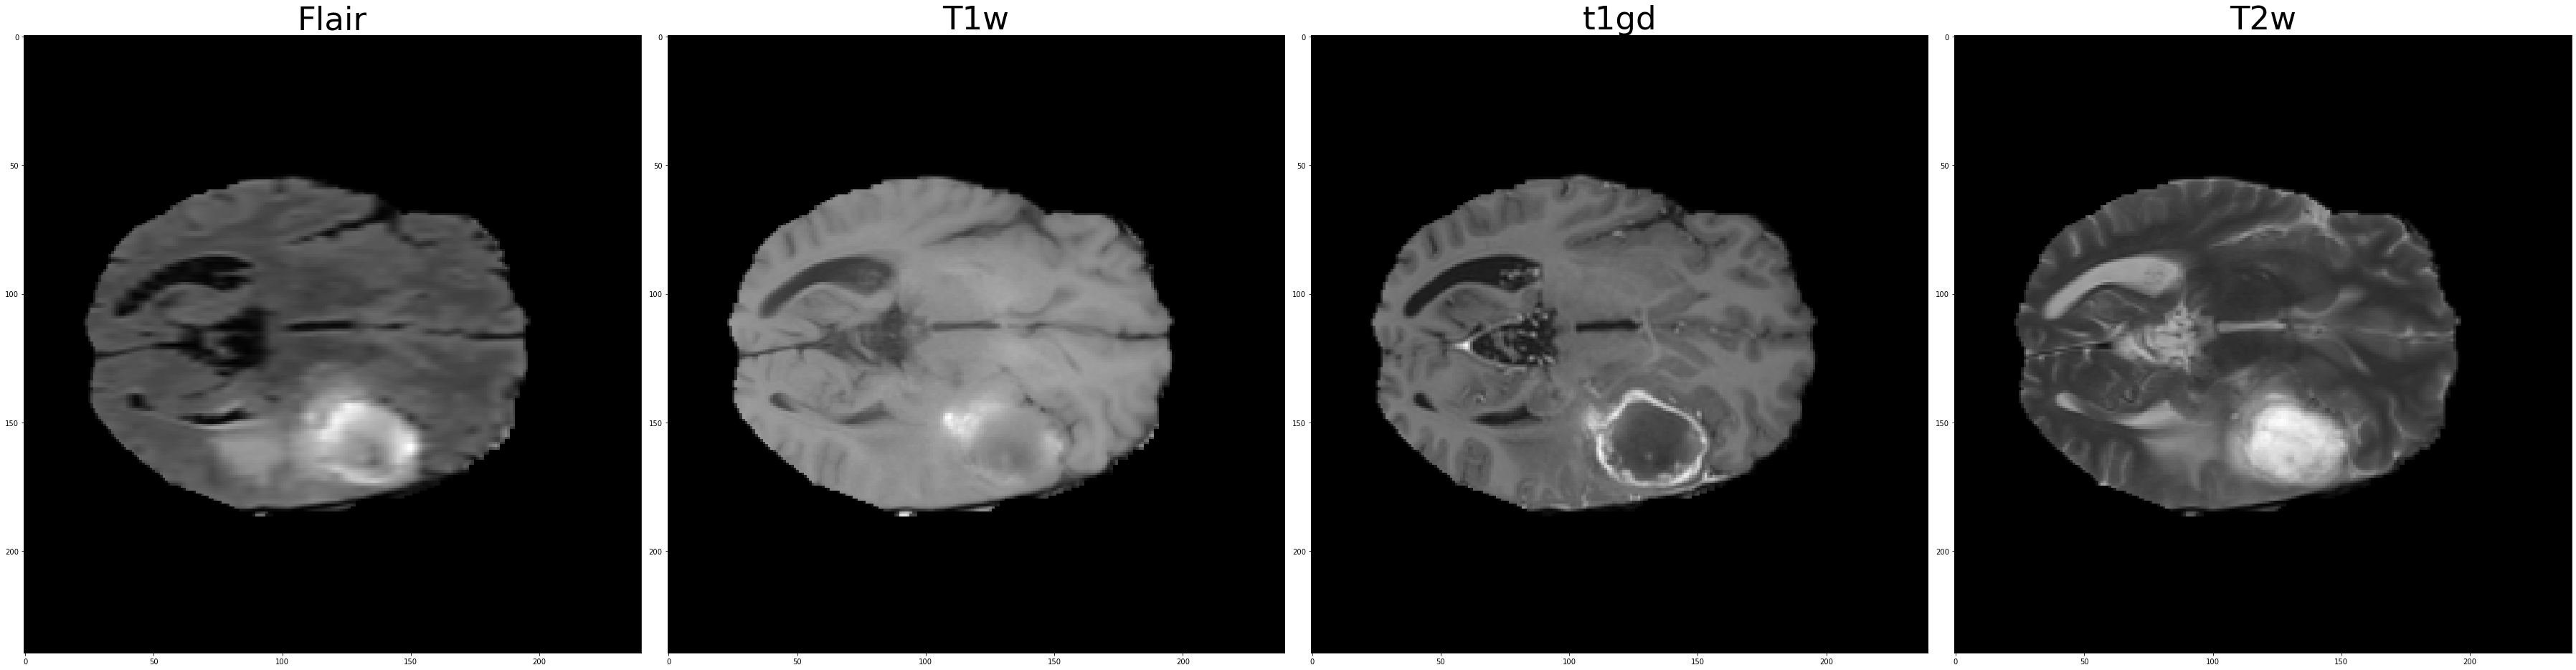

In [3]:
# Showing a random slice for all four MRIs
# Setting a random depth layer as 70
layer = 70
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
modality = {
    0: 'Flair', 
    1: 'T1w', 
    2: 't1gd',
    3: 'T2w'
}

for i in range(4):
    ax[i].set_title(modality[i], fontsize=45)
    ax[i].imshow(image[:,:,layer,i], cmap='gray')
    m = image[:,:,layer,i]
    io.imwrite(f"{modality[i]}.png", m)
plt.tight_layout()

In [4]:
mri_label = nib.load("labelsTr/BRATS_001.nii.gz")
label_array = mri_label.get_fdata()
shape = mri_label.shape
print(shape)

(240, 240, 155)


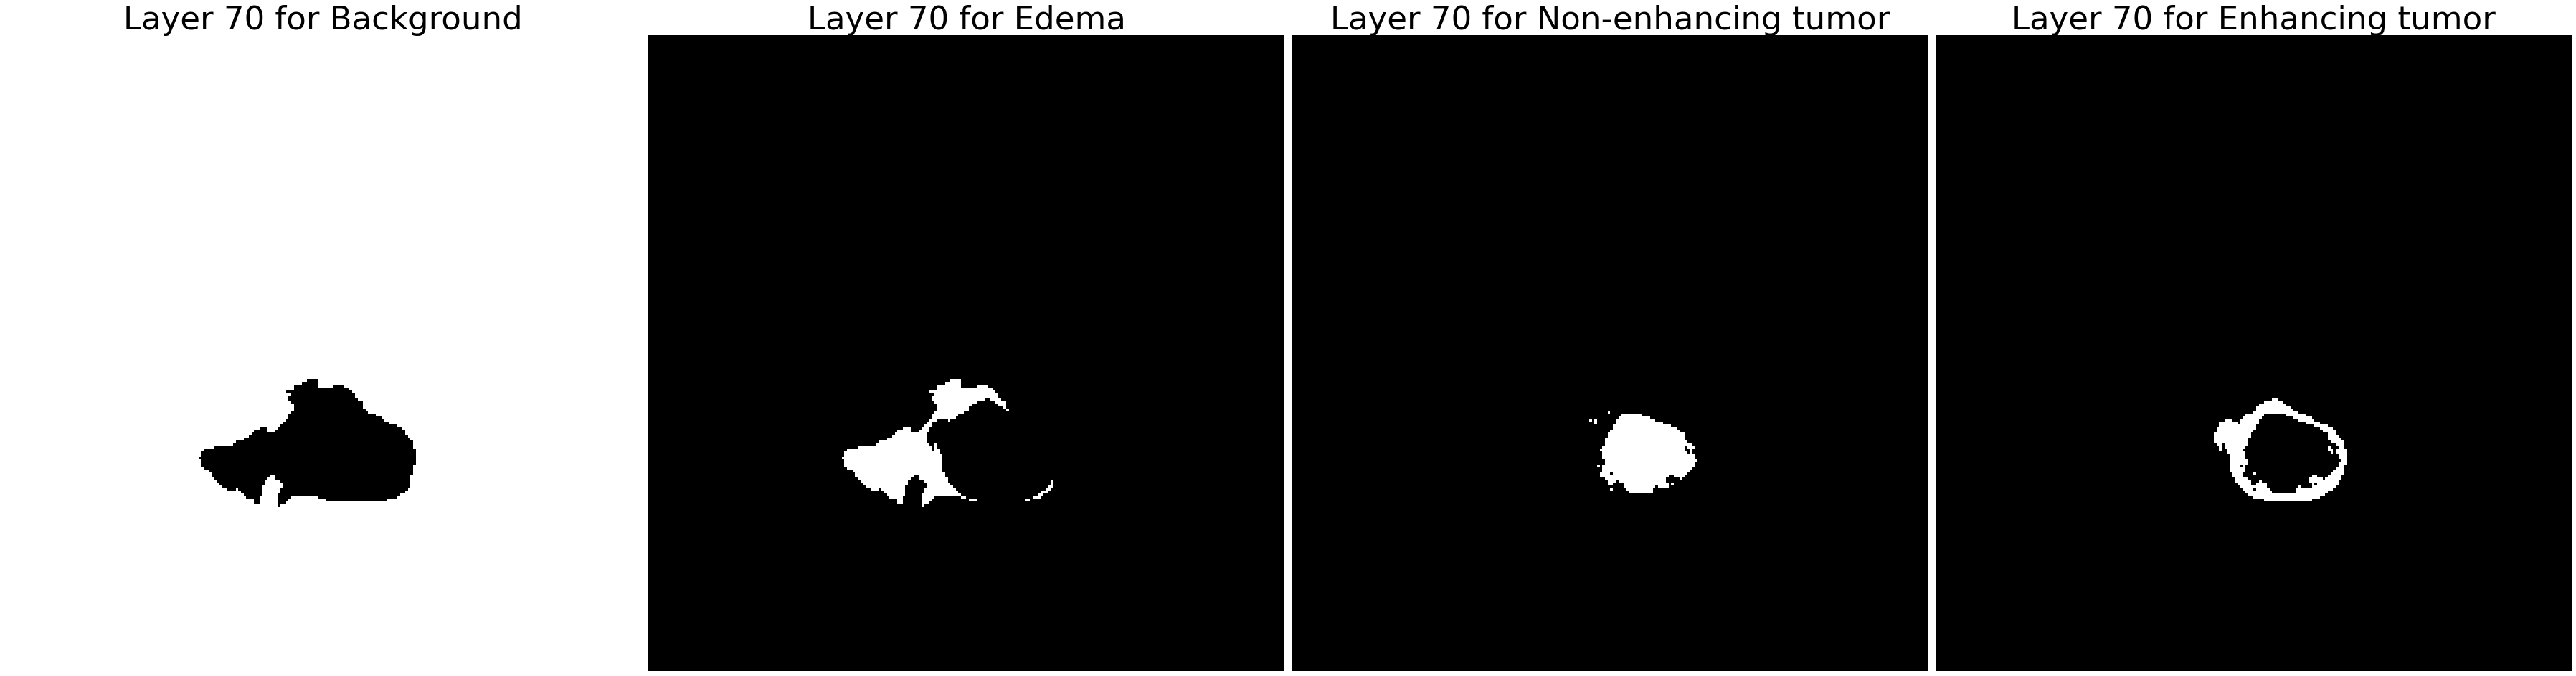

In [5]:
# Showing a random layer of all labels of a random slice
layer = 70
# Define a dictionary of class labels
classes_dict = {
    'Background': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}
# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask, cmap='gray')
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


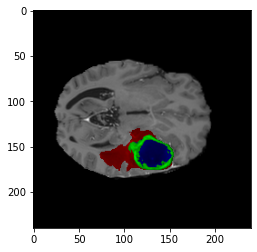

In [6]:
maskdict = {0: [0, 0, 0], 1 : [0, 255, 255], 2: [255, 255, 0], 3: [255, 0, 255]}
b = cv2.imread('t1gd.png')
final = b
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax = io.imwrite(f'{img_label_str}.png', mask)
    ax = cv2.imread(f'{img_label_str}.png')
    final = np.where(ax, maskdict[i],final) 
ab = np.where(final, 0, b)
plt.imshow(ab)

### The Red is the Edema tumor. The green the enhancing tumor and blue is the non enhancing tumor. This is the t1gd MRI.

# 3D Visualisation

In [ ]:
# 3D visualisation of a random modal brain
modality = 1
images_list = []
for i in range(0, image.shape[2], 3):
    a = image[:,:,i, modality]
    images_list.append(a)
ani = animation.ArtistAnimation(fig, images_list, interval=600, blit=False,
                                repeat_delay=1000)
io.mimsave('data/t1w.gif',images_list,fps=20)

In [5]:
from IPython.display import HTML
HTML('<img src="data/t1w.gif">')

### This is the t1w MRI scan for each layer in its depth

In [ ]:
# 3D visuaiation of the labels
images_list = []
for i in range(0, label_array.shape[2], 3):
    a = label_array[:,:,i]
    images_list.append(a)
ani = animation.ArtistAnimation(fig, images_list, interval=600, blit=False,
                                repeat_delay=1000)
io.mimsave('data/label.gif',images_list,fps=15)

In [6]:
from IPython.display import HTML
HTML('<img src="data/label.gif">')

In [ ]:
maskdict = {0: [0, 0, 0], 1 : [0, 255, 255], 2: [255, 255, 0], 3: [255, 0, 255]}
classes_dict = {
    'Background': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}
modality = 2
x=[]
for j in range(0, image.shape[2], 3):
    b = io.imwrite(f't1gd{j}.png', image[:,:,j,modality])
    b = cv2.imread(f't1gd{j}.png')
    b = np.asarray(b, dtype="int32")
    final = b
    for i in range(4):
        img_label_str = list(classes_dict.keys())[i]
        img = label_array[:,:,j]
        mask = np.where(img == classes_dict[img_label_str], 255, 0)
        ax = io.imwrite(f'{img_label_str}.png', mask)
        ax = cv2.imread(f'{img_label_str}.png')
        ax = np.asarray(ax, dtype="int32")
        final = np.where(ax, maskdict[i],final) 
    ab = np.where(final, 0, b)
    x.append(ab)

In [ ]:
ani = animation.ArtistAnimation(fig, x, interval=600, blit=False,
                                repeat_delay=1000)
io.mimsave('data/final.gif',x,fps=15)

In [2]:
from IPython.display import HTML
HTML('<img src="data/final.gif">')

### The Red is the Edema tumor. The green the enhancing tumor and blue is the non enhancing tumor. This is the t1gd MRI.